# Importing Libraries

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Setting Device

In [2]:
def set_device():
    if torch.cuda.is_available():
        dev = "cuda:0"
    else:
        dev = "cpu"
    return torch.device(dev)

device = set_device()

# Load the trained model

In [3]:
model = models.resnet18()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 6)

model.load_state_dict(torch.load('best_solar_panel_model_0.9036.pth', map_location=device))
model = model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Data Prep

In [4]:
mean = [0.485, 0.456, 0.406]  # The mean used during training
std = [0.229, 0.224, 0.225]   # The std used during training
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Loading Data

In [5]:
data_dir = ""
test_dir = "test"
test_dataset = datasets.ImageFolder(root=test_dir, transform=data_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluation

In [6]:
class_names = test_dataset.classes

# Evaluate the Model on the Test Set
y_test = []
y_pred = []

model.eval()
for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    y_test.extend(labels.cpu().numpy())
    y_pred.extend(preds.cpu().numpy())

# Confusion Matrix

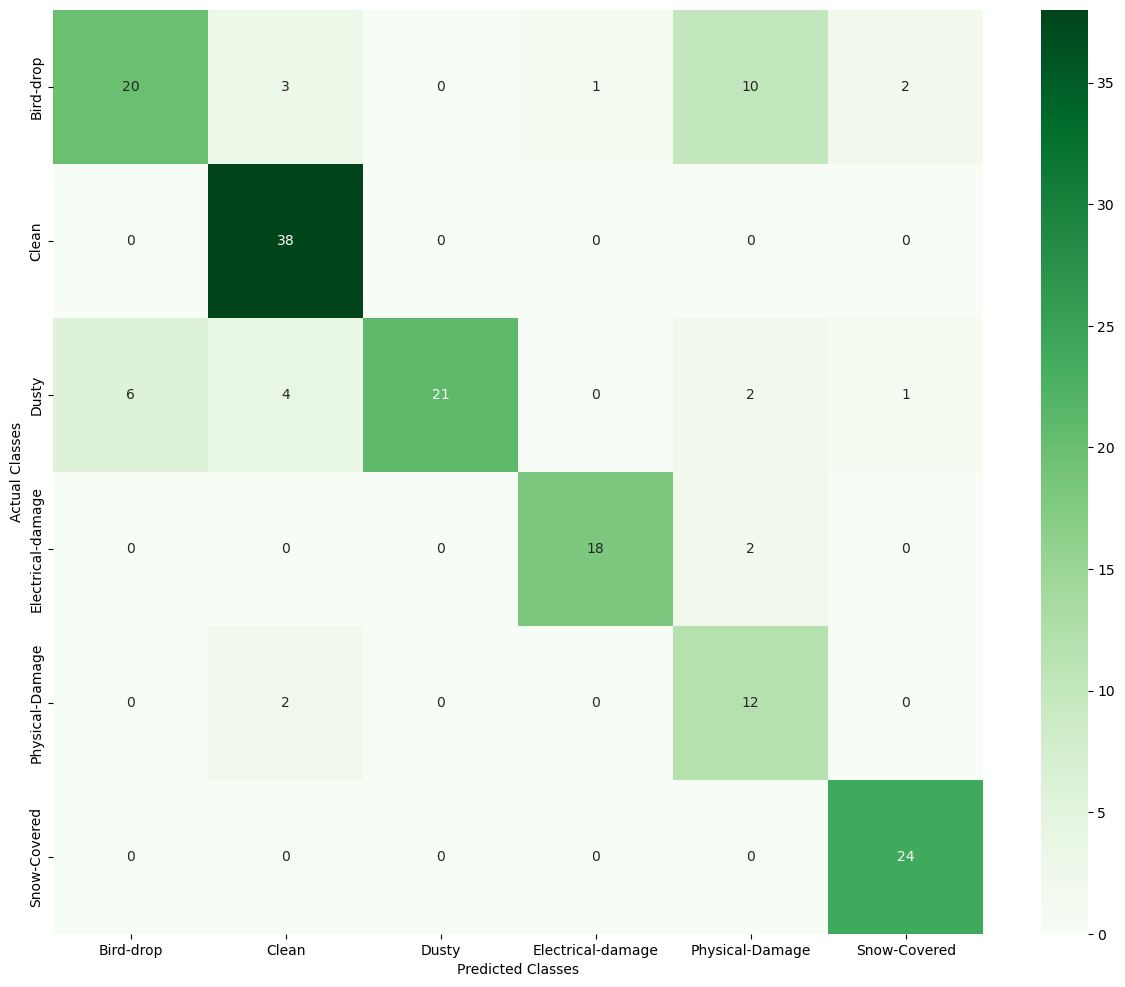

In [7]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(cm, cmap="Greens", annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# Classification Report

In [8]:
print(classification_report(y_test, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

        Bird-drop       0.77      0.56      0.65        36
            Clean       0.81      1.00      0.89        38
            Dusty       1.00      0.62      0.76        34
Electrical-damage       0.95      0.90      0.92        20
  Physical-Damage       0.46      0.86      0.60        14
     Snow-Covered       0.89      1.00      0.94        24

         accuracy                           0.80       166
        macro avg       0.81      0.82      0.79       166
     weighted avg       0.84      0.80      0.80       166



In [9]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8012
Recall: 0.8012
Precision: 0.8383
F1 Score: 0.7989
